In [16]:
import math#数学符号和计算公式
import numpy as np 
import pylab as pl
import matplotlib.pyplot as plt
import scipy.signal as signal#数学包求极值
from scipy import fftpack  
import scipy.signal as signal
from scipy import interpolate

In [17]:
#判定当前的时间序列是否是单调序列
def ismonotonic(x):
    max_peaks=signal.argrelextrema(x,np.greater)[0]
    min_peaks=signal.argrelextrema(x,np.less)[0]
    all_num=len(max_peaks)+len(min_peaks)
    if all_num>0:
        return False
    else:
        return True

In [18]:
#寻找当前时间序列的极值点
def findpeaks(x):
    return signal.argrelextrema(x,np.greater)[0]

In [19]:
#判断当前的序列是否为 IMF 序列
def isImf(x):
    N=np.size(x)
    pass_zero=np.sum(x[0:N-2]*x[1:N-1]<0)#过零点的个数
    peaks_num=np.size(findpeaks(x))+np.size(findpeaks(-x))#极值点的个数
    if abs(pass_zero-peaks_num)>1:
        return False
    else:
        return True

In [20]:
#获取当前样条曲线
def getspline(x):
    N=np.size(x)
    peaks=findpeaks(x)
    print('当前极值点个数：',len(peaks))
    if(len(peaks)<=3):
        if(len(peaks)<2):
            peaks=np.concatenate(([0],peaks))
            peaks=np.concatenate((peaks,[N-1]))#这里是为了防止样条次数不够，无法插值的情况
        t=interpolate.splrep(peaks,y=x[peaks], w=None, xb=None, xe=None,k=len(peaks)-1)
        return interpolate.splev(np.arange(N),t)
    t=interpolate.splrep(peaks,y=x[peaks])
    return interpolate.splev(np.arange(N),t)
#     f=interp1d(np.concatenate(([0,1],peaks,[N+1])),np.concatenate(([0,1],x[peaks],[0])),kind='cubic')
#     f=interp1d(peaks,x[peaks],kind='cubic')
#     return f(np.linspace(1,N,N))

In [21]:
#经验模态分解方法
def emd(x):
    imf=[]
    m=0#迭代次数
    i=0#每个分量
    while not ismonotonic(x) and  m<6:
        x1=x
        sd=np.inf#最后限制条件，误差范围
        while sd>0.01 or (not isImf(x1)):
            print (isImf(x1))
            s1=getspline(x1)#获取上包络函数曲线
            s2=-getspline(-1*x1)#获取下包络函数曲线
            x2=x1-(s1+s2)/2#误差数据
            sd=np.sum((x1-x2)**2)/np.sum(x1**2)#原始数据与误差数据之间的距离
            x1=x2#作为第二步原始数据
        
        imf.append(x1)
        print('第%d个分量'%i)
        i=i+1
        m=(np.array(imf).shape)[0]
        print('分解个数：',m)
        x=x-x1

    imf.append(x)
    #if m>5:
        #break
    return imf

#加躁
def wgn(x, snr):
    snr = 10**(snr/10.0)
    xpower = np.sum(x**2)/len(x)
    npower = xpower / snr
    return np.random.randn(len(x)) * np.sqrt(npower)
import random
sampling_rate=6000
f0=92
fg=4000
fft_size = 512
t=np.arange(0, 0.2, 1.0/sampling_rate)
x1=0.6*(1+np.sin(2*np.pi*f0*t))*np.sin(2*np.pi*fg*t)
x1+=wgn(x1, 3)
plt.figure(figsize=(16,4),dpi=500)
xx=x1
plt.plot(t,xx,linestyle='dashed',marker='',color = 'black')
mu = 0
sigma =1
for i in range(x1.size):
    x1[i] += random.gauss(mu,sigma)

print(len(x1))
plt.plot(t,x1,linestyle='-',marker='',color = 'red')
plt.legend()
plt.show()

m=np.random.normal(0,0.15,len(x1))
xx2=x1+m
plt.figure(figsize=(16,4),dpi=500)
plt.plot(t,xx,linestyle='dashed',marker='',color = 'black')
plt.plot(t,xx2,linestyle='-',marker='',color = 'red')
plt.ylabel('duibi')
plt.legend(['yuanshi','zonghe'])
plt.ylim((-3, 3))
plt.show()

数据量： 1200


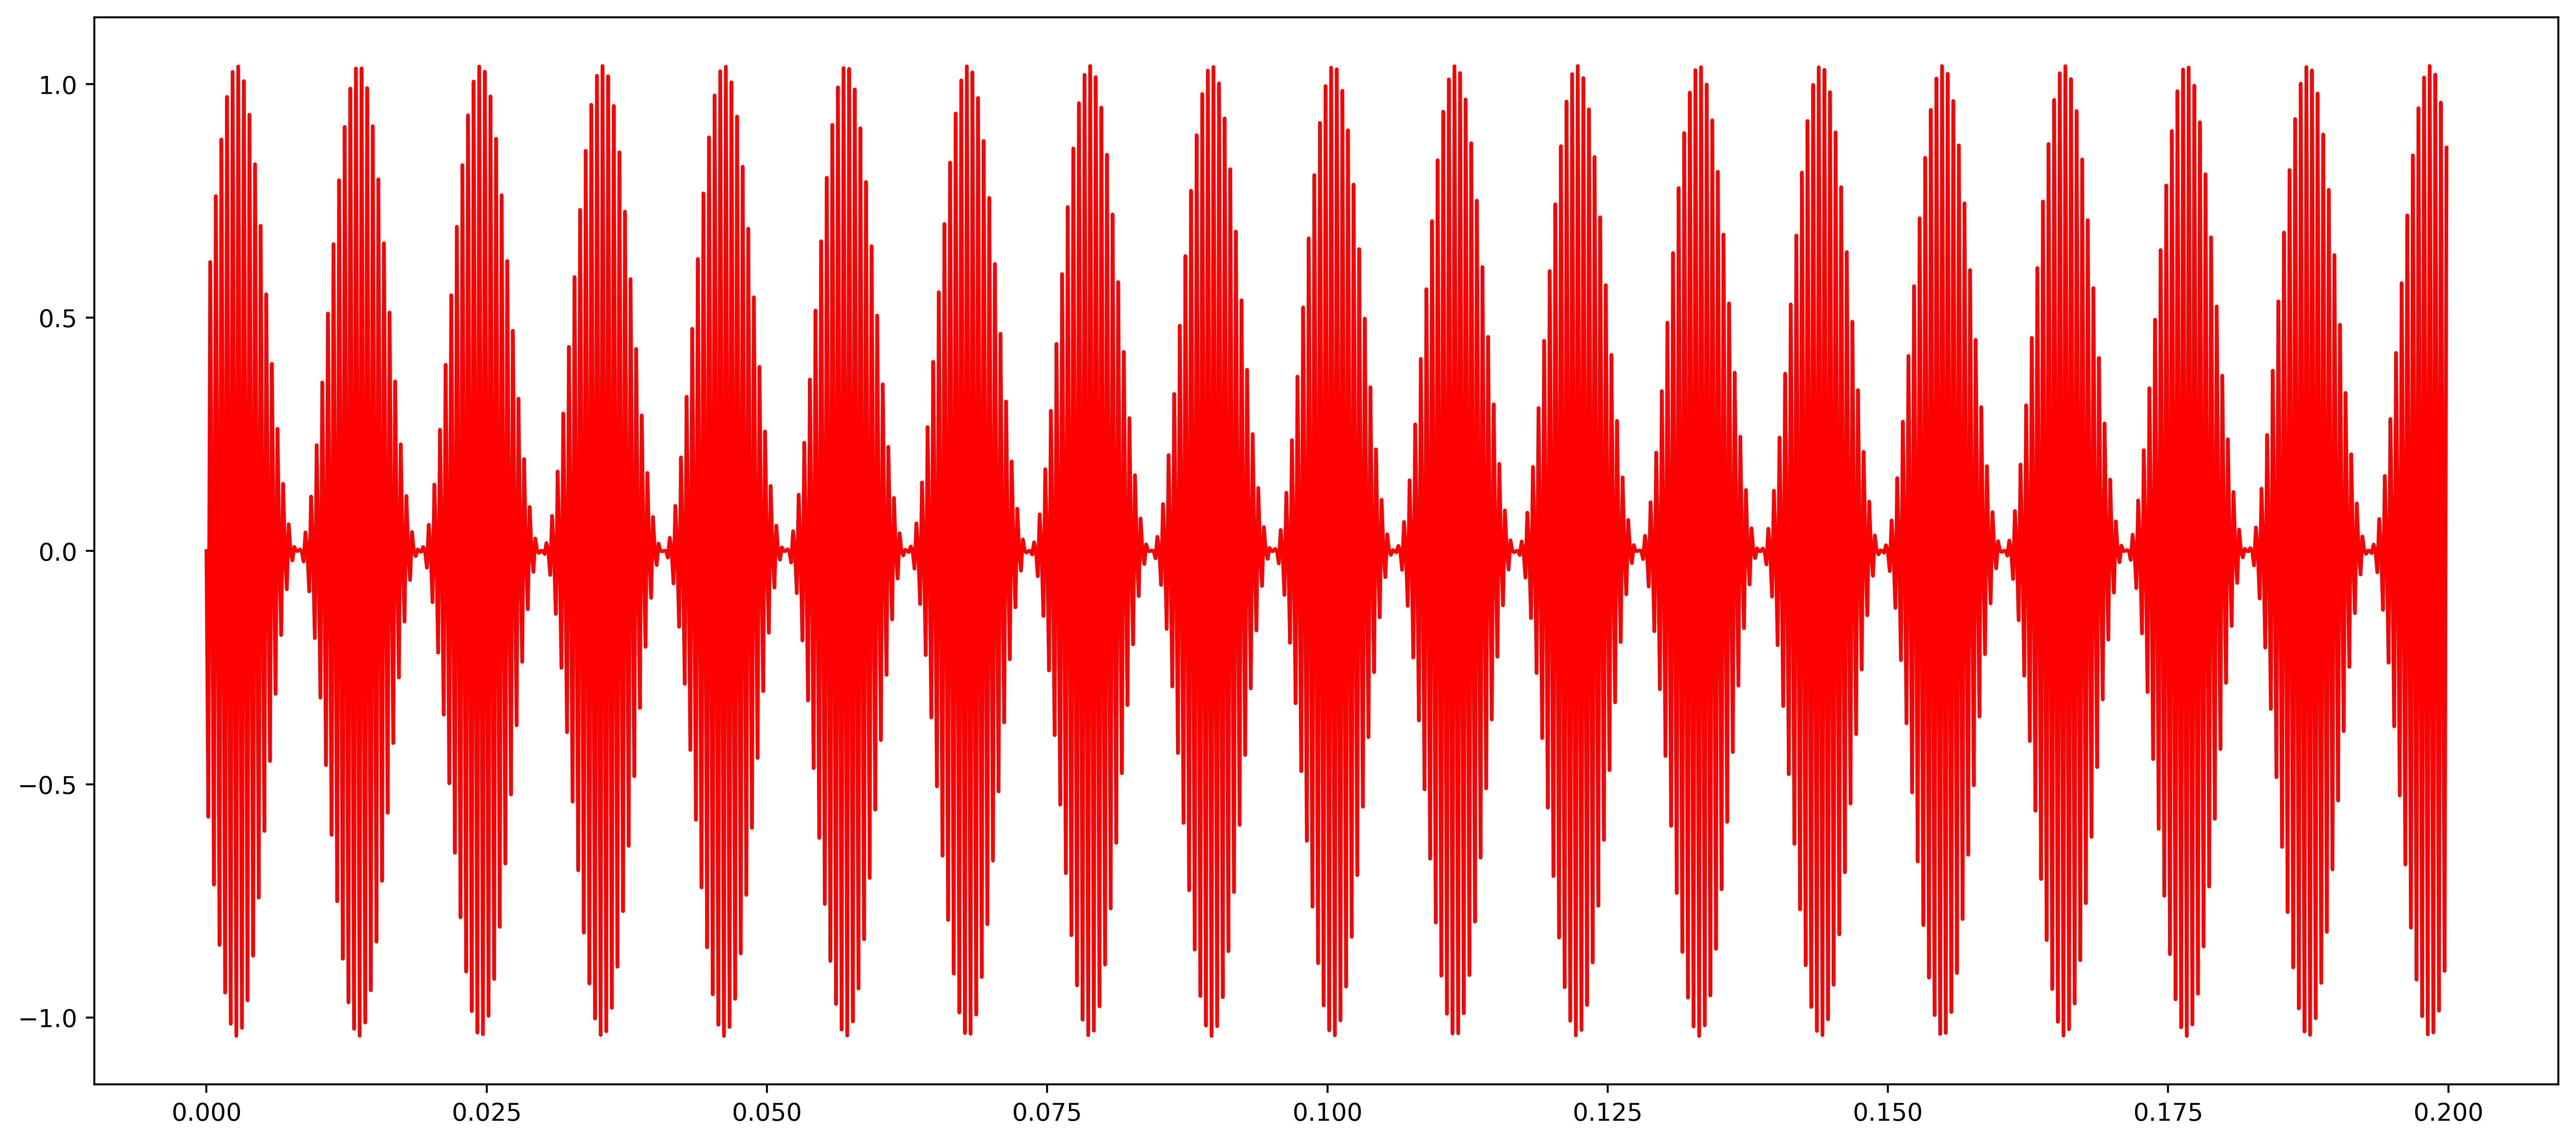

In [22]:
sampling_rate=6000
f0=92
fg=4000
fft_size = 512
t=np.arange(0, 0.2, 1.0/sampling_rate)
x2=0.6*(1+np.sin(2*np.pi*f0*t))*np.sin(2*np.pi*fg*t)
#x2=np.sin(t)
plt.figure(figsize=(18,8),dpi=500)
xx=x2
print('数据量：',len(x2))
plt.plot(t,xx,linestyle='-',marker='',color = 'r')

In [23]:
print(x2)
type(x2)
print(x2.size)

[ 0.00000000e+00 -5.69598698e-01  6.19118575e-01 ... -1.38821429e-12
 -8.99885082e-01  8.64058544e-01]
1200


In [24]:
n=10#迭代次数
o1=[]#生成n行原始数据
#o2=[]#生成n行原始数据加正噪声
#o3=[]#生成n行原始数据加负噪声
IMF=np.zeros((7,1200))#保存最终的IMF序列
#imfz=[]#保存迭代过程中的正IMF序列
#imff=[]#保存迭代过程中的负IMF序列
for i in range(n):
    o1.append(x2)
for i in range(n):
    o2=[]
    o3=[]
    #m=np.random.normal(0,0.15,len(x2))
    o2=o1[i]+m
    print('shujudaxiao:',(np.array(o2)).shape)
    print((np.array(o2))[0])
    o3=o1[i]-m
    #for j in 
    imfz=emd(o2)
    imff=emd(o3)

    IMF+=(np.array(imfz)+np.array(imff))
    FIMF=IMF/n
    print(FIMF)
    print(imfz,imff)

NameError: name 'm' is not defined

In [25]:
type(FIMF)
FIMF

NameError: name 'FIMF' is not defined

In [26]:
print(imfz,(np.array(imfz)).shape)

NameError: name 'imfz' is not defined

In [27]:
print(imff,(np.array(imff)).shape)

NameError: name 'imff' is not defined

In [28]:
zh=(np.array(imfz)+np.array(imff))
zh.shape
zh

NameError: name 'imfz' is not defined

In [29]:
imf1=emd(x2)
n1=len(imf1)
#print(imf1)
n1

False
当前极值点个数： 399
当前极值点个数： 400
第0个分量
分解个数： 1
True
当前极值点个数： 379
当前极值点个数： 378
第1个分量
分解个数： 2
False
当前极值点个数： 58
当前极值点个数： 57
第2个分量
分解个数： 3
True
当前极值点个数： 18
当前极值点个数： 18
True
当前极值点个数： 18
当前极值点个数： 18
第3个分量
分解个数： 4
True
当前极值点个数： 7
当前极值点个数： 8
False
当前极值点个数： 7
当前极值点个数： 8
False
当前极值点个数： 7
当前极值点个数： 8
False
当前极值点个数： 7
当前极值点个数： 8
False
当前极值点个数： 7
当前极值点个数： 8
第4个分量
分解个数： 5
True
当前极值点个数： 3
当前极值点个数： 2
第5个分量
分解个数： 6


7

NameError: name 'FIMF' is not defined

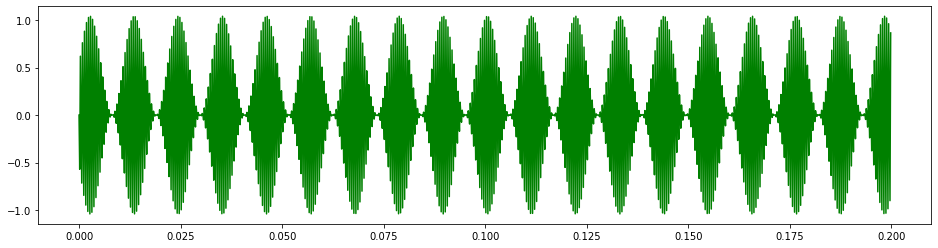

<Figure size 1152x288 with 0 Axes>

In [30]:
plt.figure(figsize=(16,4))
plt.plot(t,x2,'g')
for i in range(9):
    plt.figure(figsize=(16,4))
    #plt.subplot(12,1,1)
    plt.plot(t,FIMF[i],'g')
    plt.ylabel('imf%d'%(i))
    plt.legend('imf%d'%(i))
    plt.show()
plt.savefig('000.png')

In [31]:
np.zeros((10,4))+np.ones((10,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [32]:
a=[[1,2,3,4],[5,6,2,3]]
(np.array(a)).shape

(2, 4)

In [15]:
a+np.ones((2,4))

array([[2., 3., 4., 5.],
       [6., 7., 3., 4.]])